In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os 
from astropy import units as u
from specutils import Spectrum1D, SpectralRegion
from specutils.manipulation import SplineInterpolatedResampler

In [2]:
path = '/Users/quinncasey/Desktop/research/eboss/0.5-bin/0.5-spec-files-less'

In [3]:
for root, directories, files in os.walk(path, topdown=False):

    for name in files:
        print(os.path.join(root, name))

/Users/quinncasey/Desktop/research/eboss/0.5-bin/0.5-spec-files-less/4852/spec-4852-55689-0859.fits


In [4]:
def plot_smooth_spec(z, wave, flux, err, fig=None, **kwargs):
    
    snr = flux/err
    flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
    
    input_spec = Spectrum1D(spectral_axis=wave[np.where(snr > 0)], flux=flux[np.where(snr > 0)])
    plt.style.use('grayscale')
    f, ax = plt.subplots()  
    ax.step(input_spec.spectral_axis, input_spec.flux)
    
    plt.xlabel('R-Frame Wavelength ($\AA$)')
    plt.ylabel('erg/s/$cm^2$/Ang')
    plt.title(plate)
    
    new_disp_grid = np.arange(3000, 10000, 3) * u.AA
    spline = SplineInterpolatedResampler()
    new_spec_sp = spline(input_spec, new_disp_grid)  
    f, ax = plt.subplots()  
    
    plt.style.use('grayscale')
    plt.xlabel('R-Frame Wavelength ($\AA$)')
    plt.ylabel('erg/s/$cm^2$/Ang')
    plt.title(plate)
    
    ax.step(new_spec_sp.spectral_axis, new_spec_sp.flux)
    return

In [5]:
f1 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.5-bin/0.5-spec-files-less/4852/spec-4852-55689-0859.fits')

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


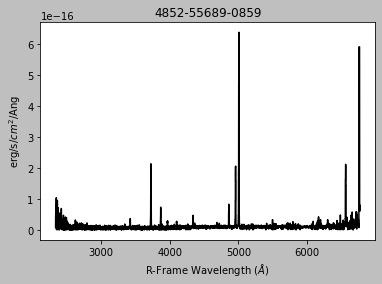

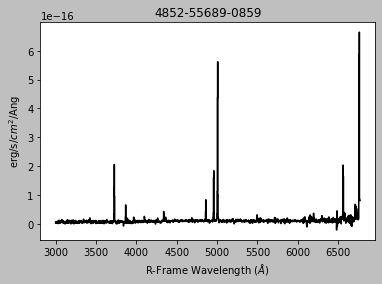

In [6]:
z = f1[2].data['z']
wave = (10**f1[1].data['loglam']* u.AA)/(1+z)
flux = f1[1].data['flux']
err = np.sqrt(1/f1[1].data['ivar'])
plate = '4852-55689-0859'

plot_smooth_spec(z, wave, flux, err)